In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lmfit
import corner
from collections import defaultdict

from matplotlib.ticker import MultipleLocator
from lmfit import Parameter, Parameters 

import sivqed.models.fitter as fitter
from sivqed.models.cavity import Cavity, MultiQubitCavity
from sivqed.models.fitter import cavity_ref_model, single_siv_ref_model

np.set_printoptions(precision=4)
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = [8, 5]

In [2]:
cavity_path = "../data/20210303_SiV4_spectrometer/cavity-spectrometer/L_B_a_1_post_tune_1_1800gr_100ms_734.00nm_2.00mm.txt"
siv_path = "../data/20210303_SiV4_spectrometer/03_03_siv4/sweeper_bwd_scans_"
siv_files = ["13_41_57.txt", "13_42_43.txt", "13_43_30.txt", "13_45_05.txt", "13_45_54.txt", "13_46_44.txt", "13_47_34.txt", "13_48_22.txt", "13_49_11.txt", "13_50_00.txt"]

# Plot Cavity Data 

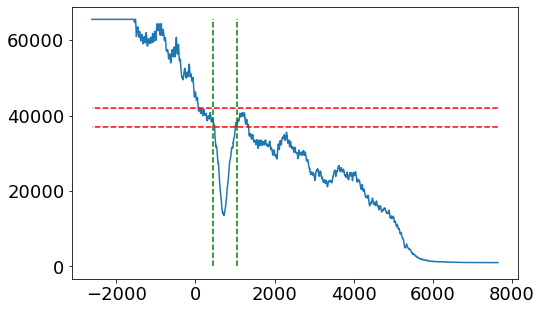

In [292]:
cavity_data = np.loadtxt(cavity_path, skiprows=2, delimiter=",")
lambdas, cavity_counts = cavity_data.T
cavity_freqs = 2.998E8 / lambdas - 406000 # GHz
plt.plot(cavity_freqs, cavity_counts)

plt.plot(cavity_freqs, [37000] * len(cavity_freqs), 'r--')
plt.plot(cavity_freqs, [42000] * len(cavity_freqs), 'r--')
plt.plot([450] * 2, [0, max(cavity_counts)], 'g--')
plt.plot([1050] * 2, [0, max(cavity_counts)], 'g--')

# Fit Cavity Spectrum

### Wide spectrum

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 62
    # data points      = 121
    # variables        = 5
    chi-square         = 1.0743e+08
    reduced chi-square = 926102.396
    Akaike info crit   = 1667.28131
    Bayesian info crit = 1681.26026
[[Variables]]
    w_c:    721.855663 +/- 1.03480078 (0.14%) (init = 700)
    k_in:   120.388870 +/- 3634827.76 (3019239.03%) (init = 100)
    k_tot:  164.053152 +/- 4.51271019 (2.75%) (init = 100)
    A:      39493.2170 +/- 2.0952e+09 (5305285.07%) (init = 40000)
    B:      4935.59826 +/- 2.0952e+09 (42451408.18%) (init = 1000)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, B)    = -1.000
    C(k_in, A) =  1.000
    C(k_in, B) = -1.000


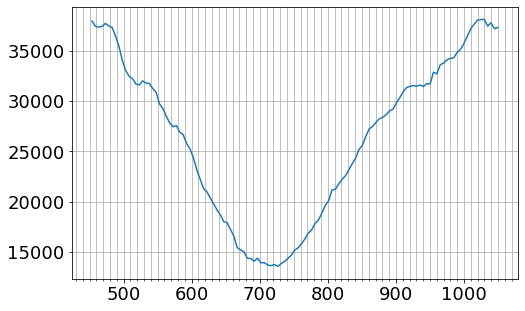

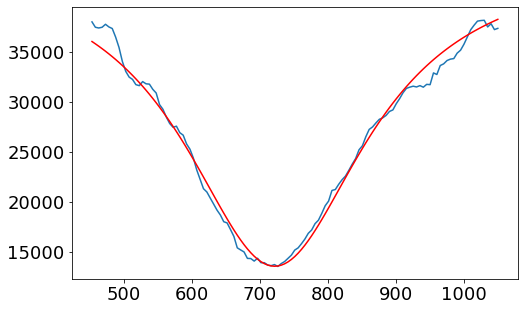

In [293]:
freq_lo = 450
freq_hi = 1050

cavity_freqs_filtered = cavity_freqs[np.logical_and(freq_lo < cavity_freqs, cavity_freqs < freq_hi)]
cavity_counts_filtered = cavity_counts[np.logical_and(freq_lo < cavity_freqs, cavity_freqs < freq_hi)]
plt.plot(cavity_freqs_filtered, cavity_counts_filtered)

plt.gca().xaxis.set_minor_locator(MultipleLocator(10))
plt.gca().yaxis.set_minor_locator(MultipleLocator(5000))
plt.grid(which='both')

##############################

params = Parameters()
params.add_many(
    Parameter('w_c', value=700, min=690, max=730),
    Parameter('k_in', value=100, min=0, max=1000),
    Parameter('k_tot', value=100, min=0, max=1000),
    Parameter('A', value=40000, min=0, max=70000),
    Parameter('B', value=1000, min=0, max=5000),
)

results = cavity_ref_model.fit(cavity_counts_filtered, params, w=cavity_freqs_filtered)
lmfit.report_fit(results)

plt.figure()
plt.plot(cavity_freqs_filtered, cavity_counts_filtered)
plt.plot(cavity_freqs_filtered, cavity_ref_model.eval(params=results.params, w=cavity_freqs_filtered), 'r')

### Narrow spectrum

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 137
    # data points      = 50
    # variables        = 5
    chi-square         = 3657429.03
    reduced chi-square = 81276.2006
    Akaike info crit   = 570.012400
    Bayesian info crit = 579.572515
[[Variables]]
    w_c:    715.953499 +/- 0.43675209 (0.06%) (init = 700)
    k_in:   124.675367 +/- 2221517.43 (1781841.49%) (init = 100)
    k_tot:  159.399874 +/- 9.07243447 (5.69%) (init = 100)
    A:      42641.4685 +/- 1.9682e+09 (4615718.40%) (init = 40000)
    B:      2.5201e-04 +/- 1.9605e+09 (777934518632151.75%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, B)       = -1.000
    C(k_in, A)    =  1.000
    C(k_in, B)    = -1.000
    C(w_c, k_tot) =  0.164


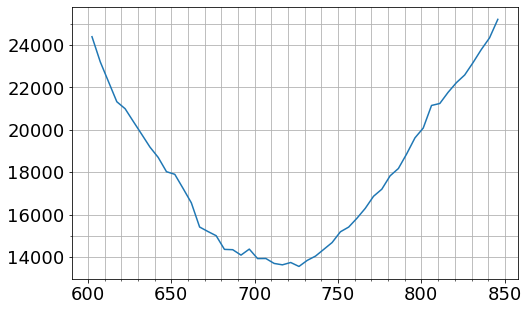

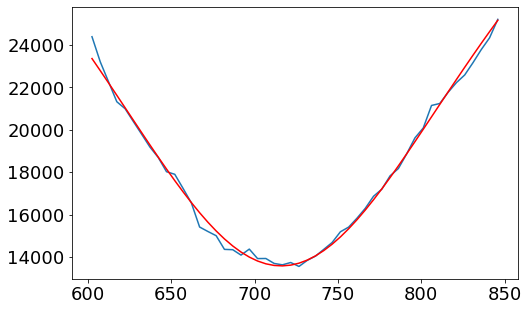

In [5]:
freq_lo = 600
freq_hi = 850

cavity_freqs_filtered = cavity_freqs[np.logical_and(freq_lo < cavity_freqs, cavity_freqs < freq_hi)]
cavity_counts_filtered = cavity_counts[np.logical_and(freq_lo < cavity_freqs, cavity_freqs < freq_hi)]
plt.plot(cavity_freqs_filtered, cavity_counts_filtered)

plt.gca().xaxis.set_minor_locator(MultipleLocator(10))
plt.gca().yaxis.set_minor_locator(MultipleLocator(5000))
plt.grid(which='both')

##############################

params = Parameters()
params.add_many(
    Parameter('w_c', value=700, min=690, max=730),
    Parameter('k_in', value=100, min=0, max=1000),
    Parameter('k_tot', value=100, min=0, max=1000),
    Parameter('A', value=40000, min=0, max=70000),
    Parameter('B', value=0.1, min=0, max=1000),
)

results = cavity_ref_model.fit(cavity_counts_filtered, params, w=cavity_freqs_filtered)
lmfit.report_fit(results)

plt.figure()
plt.plot(cavity_freqs_filtered, cavity_counts_filtered)
plt.plot(cavity_freqs_filtered, cavity_ref_model.eval(params=results.params, w=cavity_freqs_filtered), 'r')

# MCMC Fits

## Unconstrained, wide

[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 524
    # data points      = 121
    # variables        = 5
    chi-square         = 1.0741e+08
    reduced chi-square = 925939.251
    Akaike info crit   = 1667.25999
    Bayesian info crit = 1681.23894
[[Variables]]
    w_c:    721.857141 +/- 1.05985348 (0.15%) (init = 700)
    k_in:   123.808645 +/- 204.356005 (165.06%) (init = 100)
    k_tot:  164.086751 +/- 4.60543789 (2.81%) (init = 100)
    A:      41651.9609 +/- 142555.430 (342.25%) (init = 40000)
    B:      2793.33898 +/- 142553.420 (5103.33%) (init = 1000)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, B)       = -1.000
    C(k_in, A)    =  1.000
    C(k_in, B)    = -1.000
    C(w_c, k_tot) =  0.221


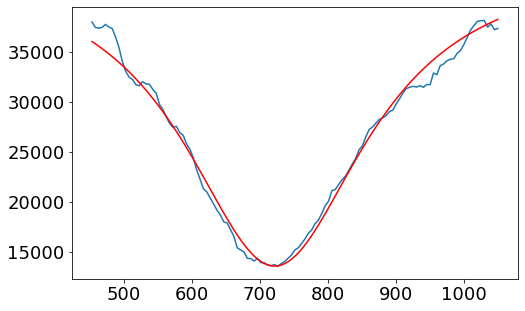

In [207]:
freq_lo = 450
freq_hi = 1050

cavity_freqs_filtered = cavity_freqs[np.logical_and(freq_lo < cavity_freqs, cavity_freqs < freq_hi)]
cavity_counts_filtered = cavity_counts[np.logical_and(freq_lo < cavity_freqs, cavity_freqs < freq_hi)]

##############################

params = Parameters()
params.add_many(
    Parameter('w_c', value=700, min=690, max=730),
    Parameter('k_in', value=100, min=0, max=1000),
    Parameter('k_tot', value=100, min=0, max=1000),
    Parameter('A', value=40000, vary=True, min=35000, max=42000),
    Parameter('B', value=1000, vary=True, min=0, max=5000),
)

results = cavity_ref_model.fit(cavity_counts_filtered, params, w=cavity_freqs_filtered, method="nealder")
lmfit.report_fit(results)

plt.plot(cavity_freqs_filtered, cavity_counts_filtered)
plt.plot(cavity_freqs_filtered, cavity_ref_model.eval(params=results.params, w=cavity_freqs_filtered), 'r')

In [208]:
results.params.add('__lnsigma', value=np.log(50), min=np.log(1), max=np.log(5000))
emcee_results = cavity_ref_model.fit(cavity_counts_filtered, results.params, w=cavity_freqs_filtered, method="emcee",
                                     fit_kws={"is_weighted": False, "burn": 300, "steps": 6000, "thin": 1})

100%|██████████████████████████████████████████████████| 6000/6000 [00:51<00:00, 117.63it/s]


Autocorrelation times: [66.6544 73.5199 63.0731 71.797  98.95   59.7755]
Max 50 x Autocorrelation times: 4947.5015402417985

Median of posterior probability distribution
--------------------------------------------
[[Variables]]
    w_c:        721.832206 +/- 1.05323018 (0.15%) (init = 721.8571)
    k_in:       122.053403 +/- 3.28939948 (2.70%) (init = 123.8086)
    k_tot:      163.526184 +/- 4.50337458 (2.75%) (init = 164.0868)
    A:          40718.7989 +/- 911.773553 (2.24%) (init = 41651.96)
    B:          3778.66958 +/- 901.188703 (23.85%) (init = 2793.339)
    __lnsigma:  6.86723036 +/- 0.06616207 (0.96%) (init = 3.912023)
[[Correlations]] (unreported correlations are < 0.100)
    C(k_in, k_tot) =  0.920
    C(A, B)        = -0.763
    C(k_in, A)     =  0.620
    C(k_tot, A)    =  0.333
    C(k_tot, B)    =  0.303
    C(w_c, k_tot)  =  0.222
    C(w_c, k_in)   =  0.199


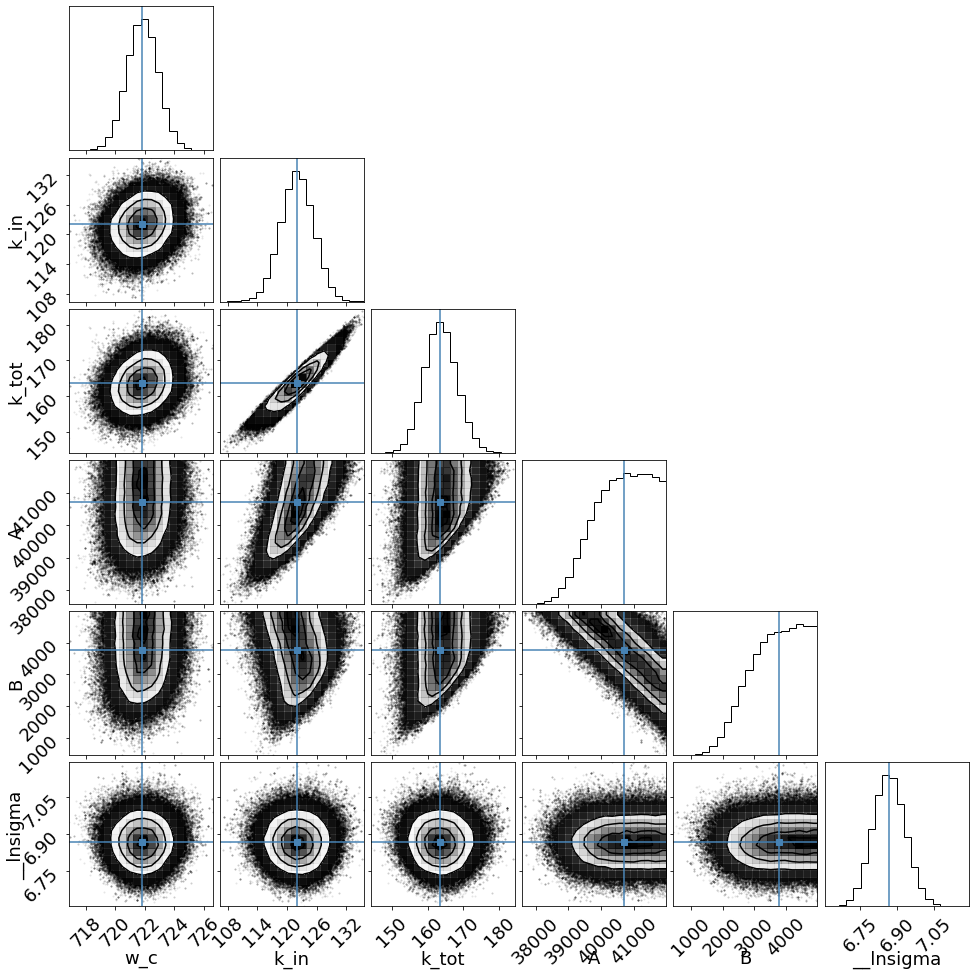

In [214]:
print(f"Autocorrelation times: {emcee_results.acor}")
print(f"Max 50 x Autocorrelation times: {max(50 * emcee_results.acor)}\n")

fitted_var_names = [param.name for param in emcee_results.params.values() if param.vary]
fitted_values = [param.value for param in emcee_results.params.values() if param.vary]

emcee_plot = corner.corner(emcee_results.flatchain, labels=emcee_results.var_names, truths=fitted_values)

plt.figure()
plt.plot(emcee_results.acceptance_fraction, 'b')

print('Median of posterior probability distribution')
print('--------------------------------------------')
lmfit.report_fit(emcee_results.params)

In [216]:
highest_prob_idx = np.argmax(emcee_results.lnprob)
mle_soln = emcee_results.chain[np.unravel_index(highest_prob_idx, emcee_results.lnprob.shape)]

emcee_mle_params = emcee_results.params.copy()
for i, name in enumerate(fitted_var_names):
    emcee_mle_params[name].value = mle_soln[i]

print('\nMaximum Likelihood Estimation from emcee       ')
print('-------------------------------------------------')
print('Parameter  MLE Value   Median Value   Uncertainty')
for name in fitted_var_names:
    print(f'  {name:5s}  {emcee_mle_params[name].value:11.5f} {emcee_results.params[name].value:11.5f}   {emcee_results.params[name].stderr:11.5f}')


Maximum Likelihood Estimation from emcee       
-------------------------------------------------
Parameter  MLE Value   Median Value   Uncertainty
  w_c      721.86793   721.83221       1.05323
  k_in     120.53133   122.05340       3.28940
  k_tot    164.04416   163.52618       4.50337
  A      39534.27012 40718.79886     911.77355
  B       4886.19483  3778.66958     901.18870
  __lnsigma      6.85024     6.86723       0.06616


## Constrained A, wide

[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 544
    # data points      = 121
    # variables        = 4
    chi-square         = 1.0741e+08
    reduced chi-square = 918025.240
    Akaike info crit   = 1665.25999
    Bayesian info crit = 1676.44315
[[Variables]]
    w_c:    721.857138 +/- 1.05531360 (0.15%) (init = 700)
    k_in:   122.416075 +/- 2.71071928 (2.21%) (init = 100)
    k_tot:  164.086757 +/- 4.58565967 (2.79%) (init = 100)
    A:      40718 (fixed)
    B:      3727.30032 +/- 575.530541 (15.44%) (init = 1000)
[[Correlations]] (unreported correlations are < 0.100)
    C(k_in, k_tot) =  0.967
    C(k_tot, B)    =  0.927
    C(k_in, B)     =  0.808
    C(w_c, B)      =  0.230
    C(w_c, k_tot)  =  0.221
    C(w_c, k_in)   =  0.199


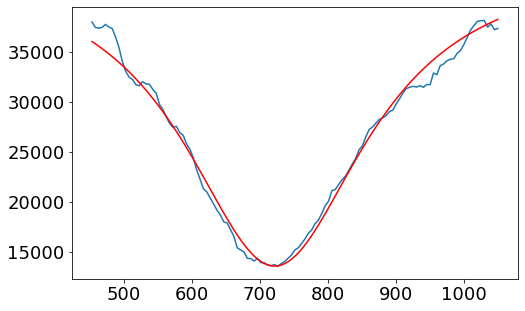

In [217]:
freq_lo = 450
freq_hi = 1050

cavity_freqs_filtered = cavity_freqs[np.logical_and(freq_lo < cavity_freqs, cavity_freqs < freq_hi)]
cavity_counts_filtered = cavity_counts[np.logical_and(freq_lo < cavity_freqs, cavity_freqs < freq_hi)]

##############################

params = Parameters()
params.add_many(
    Parameter('w_c', value=700, min=690, max=730),
    Parameter('k_in', value=100, min=0, max=1000),
    Parameter('k_tot', value=100, min=0, max=1000),
    Parameter('A', value=40718, vary=False),
    Parameter('B', value=1000, vary=True, min=0, max=5000),
)

results = cavity_ref_model.fit(cavity_counts_filtered, params, w=cavity_freqs_filtered, method="nealder")
lmfit.report_fit(results)

plt.plot(cavity_freqs_filtered, cavity_counts_filtered)
plt.plot(cavity_freqs_filtered, cavity_ref_model.eval(params=results.params, w=cavity_freqs_filtered), 'r')

In [218]:
results.params.add('__lnsigma', value=np.log(50), min=np.log(1), max=np.log(5000))
emcee_results = cavity_ref_model.fit(cavity_counts_filtered, results.params, w=cavity_freqs_filtered, method="emcee",
                                     fit_kws={"is_weighted": False, "burn": 300, "steps": 6000, "thin": 1})

100%|██████████████████████████████████████████████████| 6000/6000 [00:55<00:00, 108.76it/s]


Autocorrelation times: [51.583  66.3176 65.7059 57.2224 42.628 ]
Max 50 x Autocorrelation times: 3315.8792454072077

Median of posterior probability distribution
--------------------------------------------
[[Variables]]
    w_c:        721.865876 +/- 1.06233280 (0.15%) (init = 721.8571)
    k_in:       122.562500 +/- 2.66695344 (2.18%) (init = 122.4161)
    k_tot:      164.390213 +/- 4.50647264 (2.74%) (init = 164.0868)
    A:          40718 (fixed)
    B:          3765.49345 +/- 563.742408 (14.97%) (init = 3727.3)
    __lnsigma:  6.86850870 +/- 0.06548663 (0.95%) (init = 3.912023)
[[Correlations]] (unreported correlations are < 0.100)
    C(k_in, k_tot) =  0.965
    C(k_tot, B)    =  0.919
    C(k_in, B)     =  0.791
    C(w_c, B)      =  0.214
    C(w_c, k_tot)  =  0.206
    C(w_c, k_in)   =  0.184


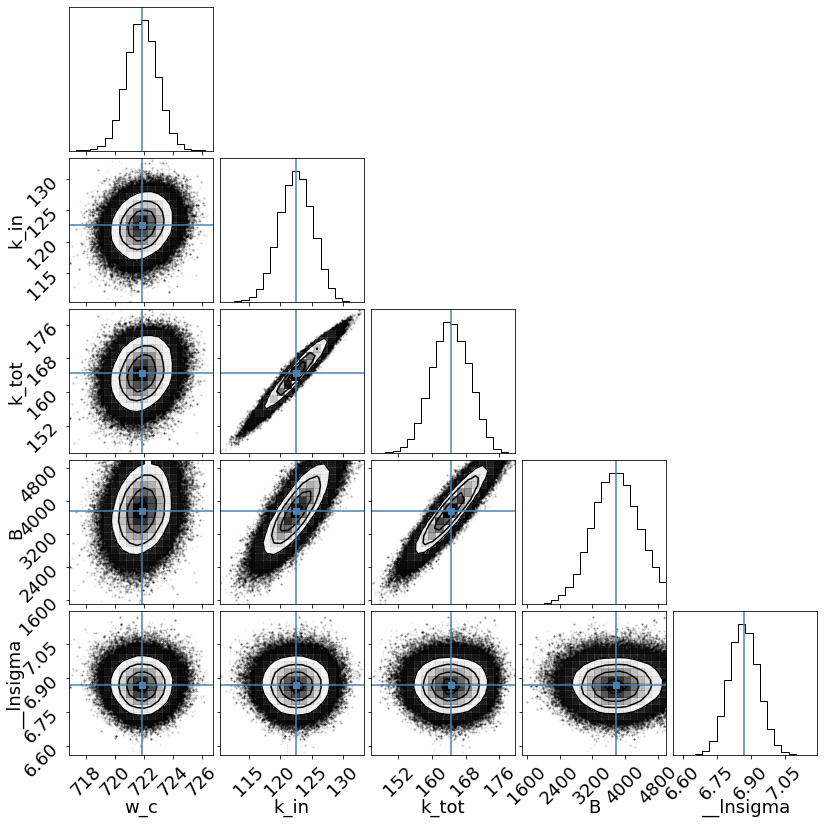

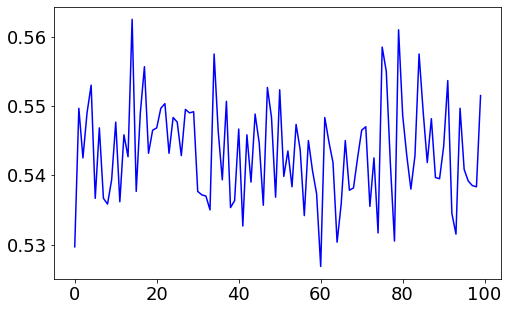

In [221]:
print(f"Autocorrelation times: {emcee_results.acor}")
print(f"Max 50 x Autocorrelation times: {max(50 * emcee_results.acor)}\n")

fitted_var_names = [param.name for param in emcee_results.params.values() if param.vary]
fitted_values = [param.value for param in emcee_results.params.values() if param.vary]

emcee_plot = corner.corner(emcee_results.flatchain, labels=emcee_results.var_names, truths=fitted_values)

plt.figure()
plt.plot(emcee_results.acceptance_fraction, 'b')

print('Median of posterior probability distribution')
print('--------------------------------------------')
lmfit.report_fit(emcee_results.params)

In [220]:
highest_prob_idx = np.argmax(emcee_results.lnprob)
mle_soln = emcee_results.chain[np.unravel_index(highest_prob_idx, emcee_results.lnprob.shape)]

emcee_mle_params = emcee_results.params.copy()
for i, name in enumerate(fitted_var_names):
    emcee_mle_params[name].value = mle_soln[i]

print('\nMaximum Likelihood Estimation from emcee       ')
print('-------------------------------------------------')
print('Parameter  MLE Value   Median Value   Uncertainty')
for name in fitted_var_names:
    print(f'  {name:5s}  {emcee_mle_params[name].value:11.5f} {emcee_results.params[name].value:11.5f}   {emcee_results.params[name].stderr:11.5f}')


Maximum Likelihood Estimation from emcee       
-------------------------------------------------
Parameter  MLE Value   Median Value   Uncertainty
  w_c      721.80474   721.86588       1.06233
  k_in     122.18788   122.56250       2.66695
  k_tot    163.75551   164.39021       4.50647
  B       3698.90518  3765.49345     563.74241
  __lnsigma      6.84454     6.86851       0.06549


## Constrained A, B, wide

[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 257
    # data points      = 121
    # variables        = 3
    chi-square         = 1.0741e+08
    reduced chi-square = 910278.643
    Akaike info crit   = 1663.26441
    Bayesian info crit = 1671.65179
[[Variables]]
    w_c:    721.873079 +/- 1.02246451 (0.14%) (init = 700)
    k_in:   122.559431 +/- 1.59026668 (1.30%) (init = 100)
    k_tot:  164.365166 +/- 1.71484168 (1.04%) (init = 100)
    A:      40718 (fixed)
    B:      3765 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(k_in, k_tot) =  0.984


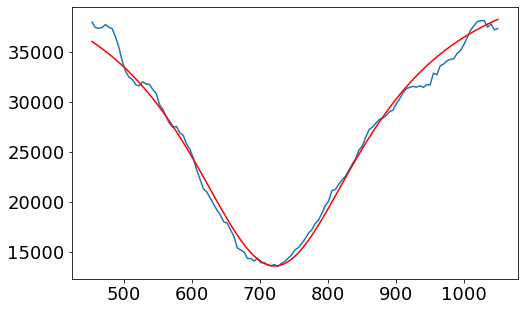

In [222]:
freq_lo = 450
freq_hi = 1050

cavity_freqs_filtered = cavity_freqs[np.logical_and(freq_lo < cavity_freqs, cavity_freqs < freq_hi)]
cavity_counts_filtered = cavity_counts[np.logical_and(freq_lo < cavity_freqs, cavity_freqs < freq_hi)]

##############################

params = Parameters()
params.add_many(
    Parameter('w_c', value=700, min=690, max=730),
    Parameter('k_in', value=100, min=0, max=1000),
    Parameter('k_tot', value=100, min=0, max=1000),
    Parameter('A', value=40718, vary=False),
    Parameter('B', value=3765, vary=False)
)

results = cavity_ref_model.fit(cavity_counts_filtered, params, w=cavity_freqs_filtered, method="nealder")
lmfit.report_fit(results)

plt.plot(cavity_freqs_filtered, cavity_counts_filtered)
plt.plot(cavity_freqs_filtered, cavity_ref_model.eval(params=results.params, w=cavity_freqs_filtered), 'r')

In [223]:
results.params.add('__lnsigma', value=np.log(50), min=np.log(1), max=np.log(5000))
emcee_results = cavity_ref_model.fit(cavity_counts_filtered, results.params, w=cavity_freqs_filtered, method="emcee",
                                     fit_kws={"is_weighted": False, "burn": 300, "steps": 6000, "thin": 1})

100%|███████████████████████████████████████████████████| 6000/6000 [01:03<00:00, 94.56it/s]


Autocorrelation times: [48.2403 39.0147 38.8328 60.1514]
Max 50 x Autocorrelation times: 3007.5680329714064

Median of posterior probability distribution
--------------------------------------------
[[Variables]]
    w_c:        721.865805 +/- 1.02604540 (0.14%) (init = 721.8731)
    k_in:       122.560818 +/- 1.60029361 (1.31%) (init = 122.5594)
    k_tot:      164.366697 +/- 1.72152767 (1.05%) (init = 164.3652)
    A:          40718 (fixed)
    B:          3765 (fixed)
    __lnsigma:  6.86389877 +/- 0.06548996 (0.95%) (init = 3.912023)
[[Correlations]] (unreported correlations are < 0.100)
    C(k_in, k_tot) =  0.985


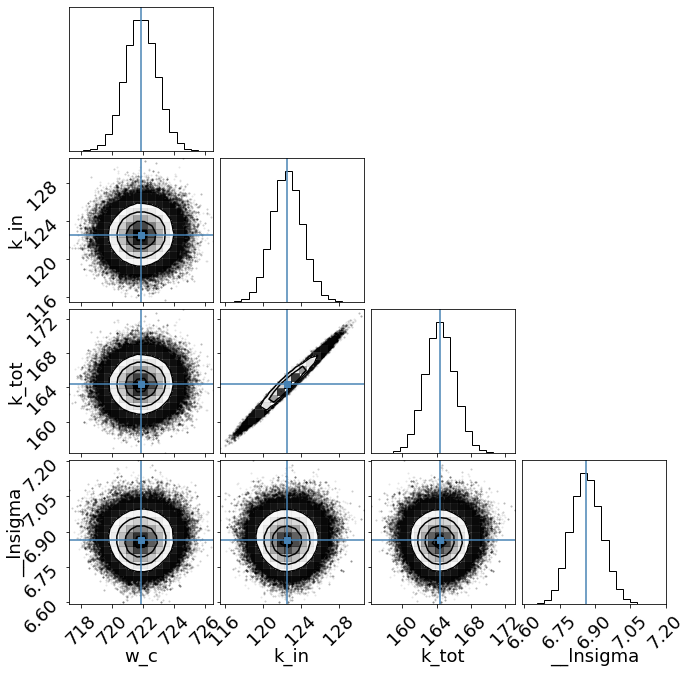

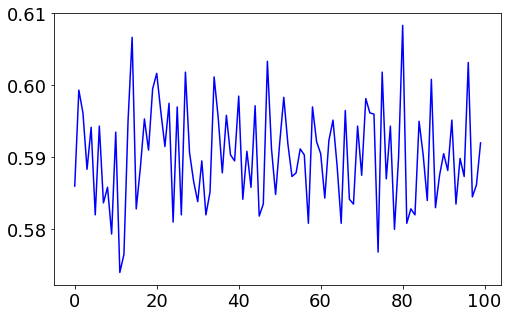

In [228]:
print(f"Autocorrelation times: {emcee_results.acor}")
print(f"Max 50 x Autocorrelation times: {max(50 * emcee_results.acor)}\n")

fitted_var_names = [param.name for param in emcee_results.params.values() if param.vary]
fitted_values = [param.value for param in emcee_results.params.values() if param.vary]

emcee_plot = corner.corner(emcee_results.flatchain, labels=emcee_results.var_names, truths=fitted_values)

plt.figure()
plt.plot(emcee_results.acceptance_fraction, 'b')

print('Median of posterior probability distribution')
print('--------------------------------------------')
lmfit.report_fit(emcee_results.params)

In [225]:
highest_prob_idx = np.argmax(emcee_results.lnprob)
mle_soln = emcee_results.chain[np.unravel_index(highest_prob_idx, emcee_results.lnprob.shape)]

emcee_mle_params = emcee_results.params.copy()
for i, name in enumerate(fitted_var_names):
    emcee_mle_params[name].value = mle_soln[i]

print('\nMaximum Likelihood Estimation from emcee       ')
print('-------------------------------------------------')
print('Parameter  MLE Value   Median Value   Uncertainty')
for name in fitted_var_names:
    print(f'  {name:5s}  {emcee_mle_params[name].value:11.5f} {emcee_results.params[name].value:11.5f}   {emcee_results.params[name].stderr:11.5f}')


Maximum Likelihood Estimation from emcee       
-------------------------------------------------
Parameter  MLE Value   Median Value   Uncertainty
  w_c      721.91009   721.86581       1.02605
  k_in     122.51862   122.56082       1.60029
  k_tot    164.31465   164.36670       1.72153
  __lnsigma      6.84881     6.86390       0.06549


## Unconstrained, narrow

In [278]:
def mcmc(freqs, counts, model, results, input_params=None):
    results.params.add('__lnsigma', value=np.log(50), min=np.log(1), max=np.log(5000))
    
    emcee_params = {"is_weighted": False, "burn": 300, "steps": 6000, "thin": 1}
    if input_params is not None: 
        emcee_params.update(input_params)
    emcee_results = model.fit(counts, results.params, w=freqs, method="emcee", fit_kws=emcee_params)
    
    try:
        print(f"Autocorrelation times: {emcee_results.acor}")
        print(f"Max 50 x Autocorrelation times: {max(50 * emcee_results.acor)}\n")
    except AttributeError:
        pass

    fitted_var_names = [param.name for param in emcee_results.params.values() if param.vary]
    fitted_values = [param.value for param in emcee_results.params.values() if param.vary]
    
    emcee_plot = corner.corner(emcee_results.flatchain, labels=emcee_results.var_names, truths=fitted_values)

    plt.figure()
    plt.plot(emcee_results.acceptance_fraction, 'b')

    print('Median of posterior probability distribution')
    print('--------------------------------------------')
    lmfit.report_fit(emcee_results.params)
    
    highest_prob_idx = np.argmax(emcee_results.lnprob)
    mle_soln = emcee_results.chain[np.unravel_index(highest_prob_idx, emcee_results.lnprob.shape)]

    emcee_mle_params = emcee_results.params.copy()
    for i, name in enumerate(fitted_var_names):
        emcee_mle_params[name].value = mle_soln[i]

    print('\nMaximum Likelihood Estimation from emcee       ')
    print('-------------------------------------------------')
    print('Parameter  MLE Value   Median Value   Uncertainty')
    for name in fitted_var_names:
        print(f'  {name:5s}  {emcee_mle_params[name].value:11.5f} {emcee_results.params[name].value:11.5f}   {emcee_results.params[name].stderr:11.5f}')
        
    return emcee_results, emcee_mle_params

[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 614
    # data points      = 70
    # variables        = 5
    chi-square         = 13492112.8
    reduced chi-square = 207570.966
    Akaike info crit   = 861.838442
    Bayesian info crit = 873.080918
[[Variables]]
    w_c:    718.088065 +/- 0.55788350 (0.08%) (init = 700)
    k_in:   125.469428 +/- 15.3195671 (12.21%) (init = 100)
    k_tot:  161.516925 +/- 5.91963038 (3.67%) (init = 100)
    A:      44070.4892 +/- 12909.0824 (29.29%) (init = 40000)
    B:      13.5251683 +/- 12849.3458 (95003.22%) (init = 1000)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, B)        = -0.996
    C(k_in, A)     =  0.983
    C(k_in, B)     = -0.963
    C(k_in, k_tot) =  0.270
    C(w_c, k_tot)  =  0.178


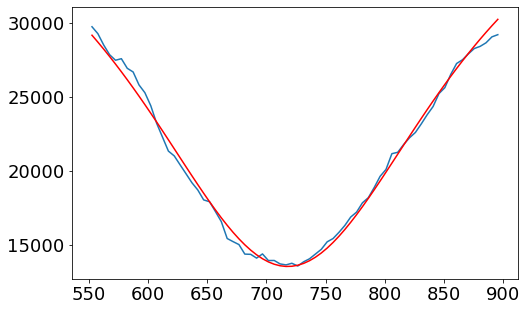

In [271]:
freq_lo = 550
freq_hi = 900

cavity_freqs_filtered = cavity_freqs[np.logical_and(freq_lo < cavity_freqs, cavity_freqs < freq_hi)]
cavity_counts_filtered = cavity_counts[np.logical_and(freq_lo < cavity_freqs, cavity_freqs < freq_hi)]

##############################

params = Parameters()
params.add_many(
    Parameter('w_c', value=700, min=690, max=730),
    Parameter('k_in', value=100, min=0, max=1000),
    Parameter('k_tot', value=100, min=0, max=1000),
    Parameter('A', value=40000, vary=True, min=38000, max=45000),
    Parameter('B', value=1000, vary=True, min=0, max=5000),
)

results = cavity_ref_model.fit(cavity_counts_filtered, params, w=cavity_freqs_filtered, method="nealder")
lmfit.report_fit(results)

plt.plot(cavity_freqs_filtered, cavity_counts_filtered)
plt.plot(cavity_freqs_filtered, cavity_ref_model.eval(params=results.params, w=cavity_freqs_filtered), 'r')

100%|██████████████████████████████████████████████████| 8000/8000 [01:05<00:00, 122.62it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 160;
tau: [ 76.7979  78.0109 104.8972 123.0811 191.3561  84.8744]
Median of posterior probability distribution
--------------------------------------------
[[Variables]]
    w_c:        718.091349 +/- 0.56255132 (0.08%) (init = 718.0881)
    k_in:       122.388983 +/- 4.14342914 (3.39%) (init = 125.4694)
    k_tot:      161.871912 +/- 5.49656770 (3.40%) (init = 161.5169)
    A:          41611.8329 +/- 1844.53863 (4.43%) (init = 44070.49)
    B:          2667.94308 +/- 1673.99395 (62.74%) (init = 13.52517)
    __lnsigma:  6.11802541 +/- 0.08629795 (1.41%) (init = 3.912023)
[[Correlations]] (unreported correlations are < 0.100)
    C(k_in, k_tot) =  0.865
    C(k_in, A)     =  0.860
    C(A, B)        = -0.742
    C(k_tot, A)    =  0.524
    C(k_in, B)     = -0.349
    C(k_tot, B)    =  0.163
    C(w_c, k_tot)  =  0.156
    C(w_c, k_in) 

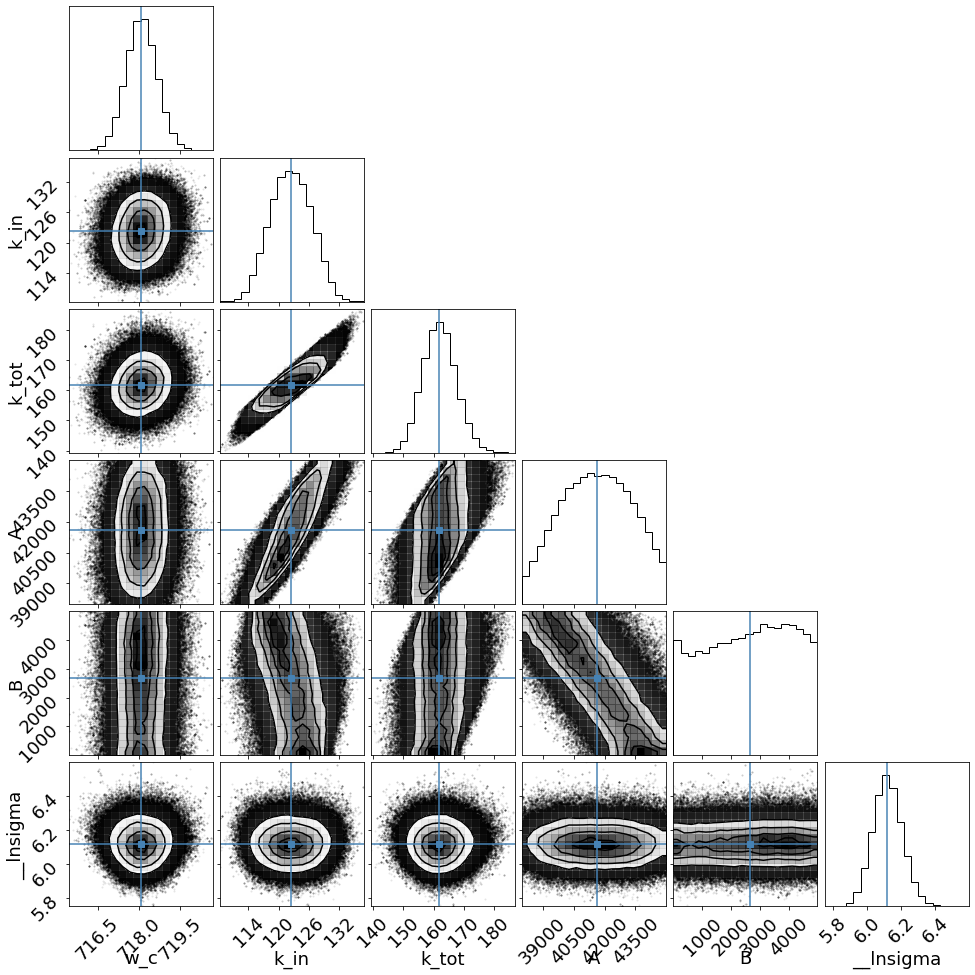

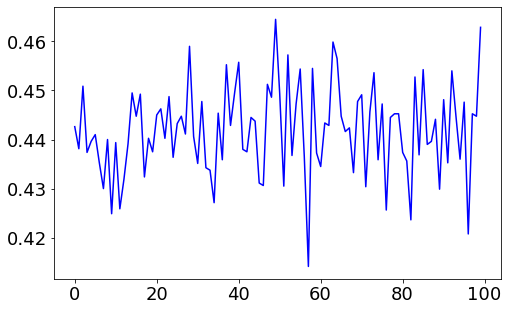

In [274]:
emcee_results, emcee_mle_params = mcmc(cavity_freqs_filtered, cavity_counts_filtered, cavity_ref_model, results, {"steps": 8000})

## Constrained B, narrow

[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 611
    # data points      = 70
    # variables        = 4
    chi-square         = 13492112.8
    reduced chi-square = 204425.952
    Akaike info crit   = 859.838442
    Bayesian info crit = 868.832423
[[Variables]]
    w_c:    718.088069 +/- 0.55364046 (0.08%) (init = 700)
    k_in:   122.102224 +/- 3.99703024 (3.27%) (init = 100)
    k_tot:  161.516982 +/- 5.87445106 (3.64%) (init = 100)
    A:      41417.0220 +/- 1206.76910 (2.91%) (init = 40000)
    B:      2667 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(k_in, k_tot) =  0.998
    C(k_tot, A)    =  0.979
    C(k_in, A)     =  0.965
    C(w_c, A)      =  0.186
    C(w_c, k_tot)  =  0.178
    C(w_c, k_in)   =  0.175


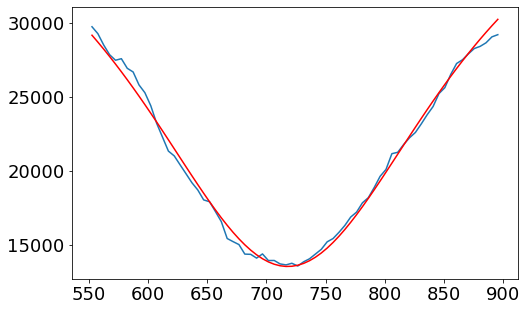

In [276]:
freq_lo = 550
freq_hi = 900

cavity_freqs_filtered = cavity_freqs[np.logical_and(freq_lo < cavity_freqs, cavity_freqs < freq_hi)]
cavity_counts_filtered = cavity_counts[np.logical_and(freq_lo < cavity_freqs, cavity_freqs < freq_hi)]

##############################

params = Parameters()
params.add_many(
    Parameter('w_c', value=700, min=690, max=730),
    Parameter('k_in', value=100, min=0, max=1000),
    Parameter('k_tot', value=100, min=0, max=1000),
    Parameter('A', value=40000, vary=True, min=38000, max=45000),
    Parameter('B', value=2667, vary=False),
)

results = cavity_ref_model.fit(cavity_counts_filtered, params, w=cavity_freqs_filtered, method="nealder")
lmfit.report_fit(results)

plt.plot(cavity_freqs_filtered, cavity_counts_filtered)
plt.plot(cavity_freqs_filtered, cavity_ref_model.eval(params=results.params, w=cavity_freqs_filtered), 'r')

100%|███████████████████████████████████████████████████| 6000/6000 [01:03<00:00, 94.68it/s]


Autocorrelation times: [51.9566 57.0789 56.6868 55.5628 69.9132]
Max 50 x Autocorrelation times: 3495.6622512064732

Median of posterior probability distribution
--------------------------------------------
[[Variables]]
    w_c:        718.102993 +/- 0.56171814 (0.08%) (init = 718.0881)
    k_in:       122.560381 +/- 4.01299399 (3.27%) (init = 122.1022)
    k_tot:      162.186170 +/- 5.90910674 (3.64%) (init = 161.517)
    A:          41553.2208 +/- 1218.39477 (2.93%) (init = 41417.02)
    B:          2667 (fixed)
    __lnsigma:  6.11828144 +/- 0.08709453 (1.42%) (init = 3.912023)
[[Correlations]] (unreported correlations are < 0.100)
    C(k_in, k_tot) =  0.998
    C(k_tot, A)    =  0.978
    C(k_in, A)     =  0.964
    C(w_c, A)      =  0.183
    C(w_c, k_tot)  =  0.174
    C(w_c, k_in)   =  0.170

Maximum Likelihood Estimation from emcee       
-------------------------------------------------
Parameter  MLE Value   Median Value   Uncertainty
  w_c      718.07746   718.10299       

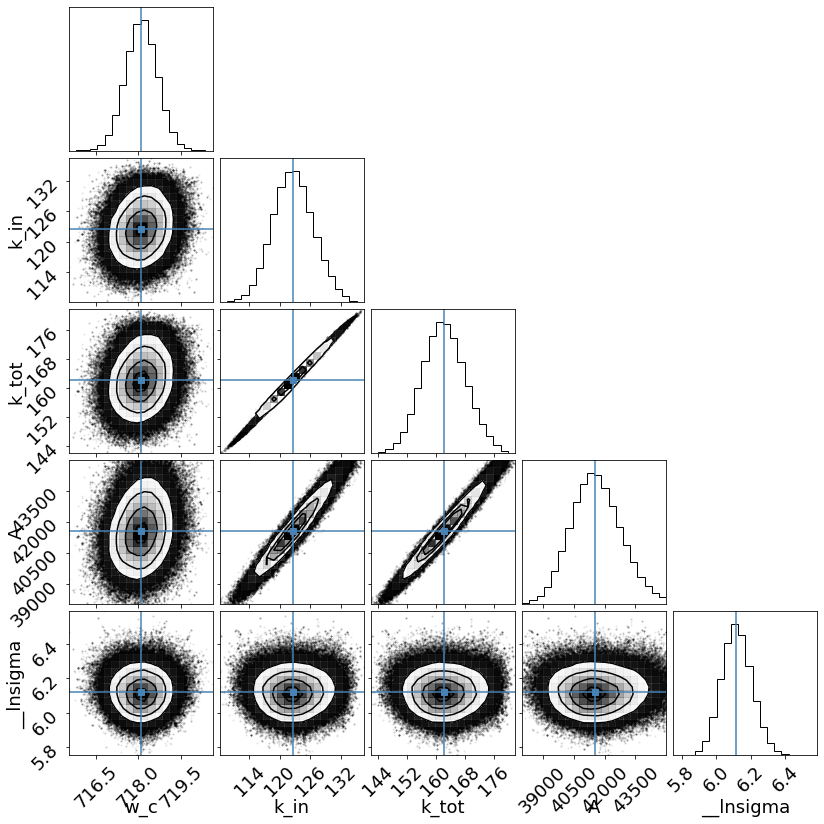

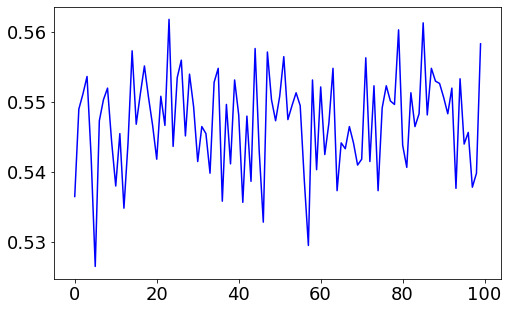

In [279]:
emcee_results, emcee_mle_params = mcmc(cavity_freqs_filtered, cavity_counts_filtered, cavity_ref_model, results)

## Constrained A, B, narrow

[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 248
    # data points      = 70
    # variables        = 3
    chi-square         = 13493735.6
    reduced chi-square = 201399.039
    Akaike info crit   = 857.846861
    Bayesian info crit = 864.592346
[[Variables]]
    w_c:    718.097249 +/- 0.53961590 (0.08%) (init = 700)
    k_in:   122.446956 +/- 1.03747266 (0.85%) (init = 100)
    k_tot:  162.031229 +/- 1.17942370 (0.73%) (init = 100)
    A:      41525 (fixed)
    B:      2667 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(k_in, k_tot) =  0.992


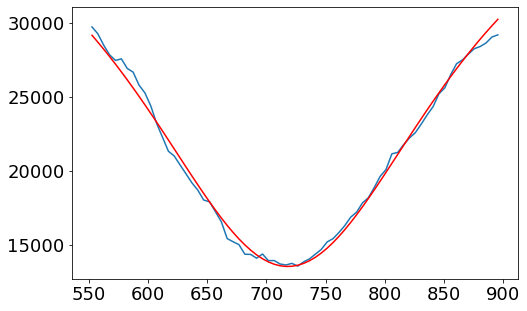

In [280]:
freq_lo = 550
freq_hi = 900

cavity_freqs_filtered = cavity_freqs[np.logical_and(freq_lo < cavity_freqs, cavity_freqs < freq_hi)]
cavity_counts_filtered = cavity_counts[np.logical_and(freq_lo < cavity_freqs, cavity_freqs < freq_hi)]

##############################

params = Parameters()
params.add_many(
    Parameter('w_c', value=700, min=690, max=730),
    Parameter('k_in', value=100, min=0, max=1000),
    Parameter('k_tot', value=100, min=0, max=1000),
    Parameter('A', value=41525, vary=False),
    Parameter('B', value=2667, vary=False),
)

results = cavity_ref_model.fit(cavity_counts_filtered, params, w=cavity_freqs_filtered, method="nealder")
lmfit.report_fit(results)

plt.plot(cavity_freqs_filtered, cavity_counts_filtered)
plt.plot(cavity_freqs_filtered, cavity_ref_model.eval(params=results.params, w=cavity_freqs_filtered), 'r')

100%|███████████████████████████████████████████████████| 6000/6000 [01:00<00:00, 99.23it/s]


Autocorrelation times: [40.1137 45.986  46.4016 85.1674]
Max 50 x Autocorrelation times: 4258.3718884192585

Median of posterior probability distribution
--------------------------------------------
[[Variables]]
    w_c:        718.095375 +/- 0.54466877 (0.08%) (init = 718.0972)
    k_in:       122.463532 +/- 1.04282032 (0.85%) (init = 122.447)
    k_tot:      162.049342 +/- 1.18301519 (0.73%) (init = 162.0312)
    A:          41525 (fixed)
    B:          2667 (fixed)
    __lnsigma:  6.11061056 +/- 0.08656350 (1.42%) (init = 3.912023)
[[Correlations]] (unreported correlations are < 0.100)
    C(k_in, k_tot) =  0.992

Maximum Likelihood Estimation from emcee       
-------------------------------------------------
Parameter  MLE Value   Median Value   Uncertainty
  w_c      718.12290   718.09538       0.54467
  k_in     122.45248   122.46353       1.04282
  k_tot    162.04319   162.04934       1.18302
  __lnsigma      6.08338     6.11061       0.08656


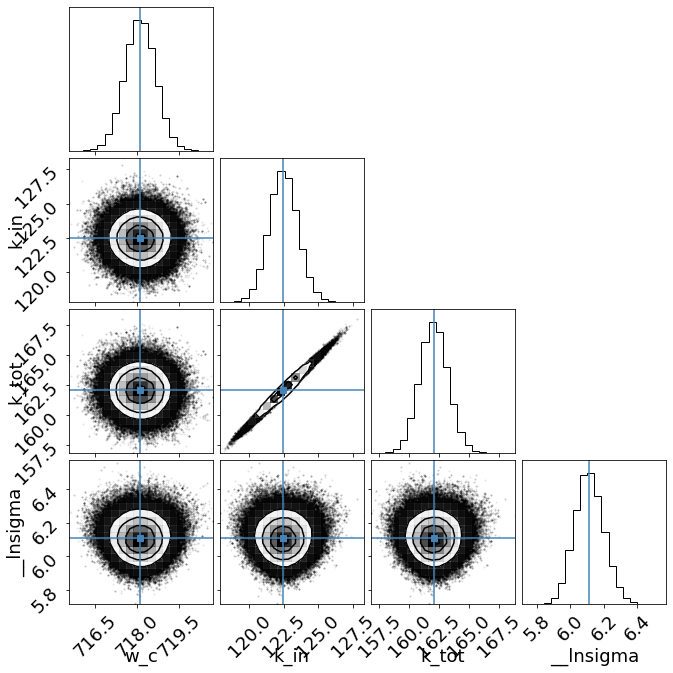

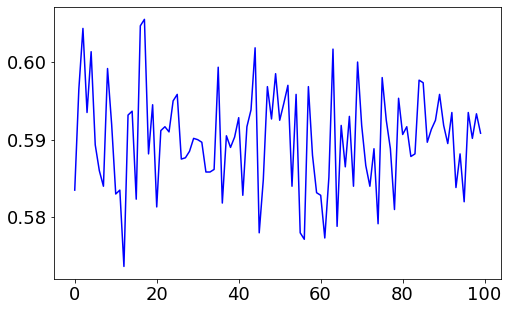

In [281]:
emcee_results, emcee_mle_params = mcmc(cavity_freqs_filtered, cavity_counts_filtered, cavity_ref_model, results)